## curve fitting of only one feature using 
- curve_fit in (scipy)
- linearRegrression in sklearn ( linear_model , polynimial_model )

## 1- Importing the libiraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 
import plotly.express as px 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures


## 2- inialize the data 

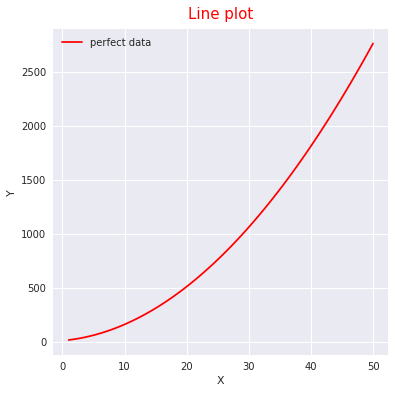

In [2]:
# lets say that x in this range 
X=np.linspace(1,50,100)
# the target ( dependant variable ) is defined by the folloeing function 
Y=X**2+ 5*X +10
# set the style for the plot
plt.style.use("seaborn")
# lets plot the data 
plt.figure(figsize=(6,6))
plt.plot(X,Y,c="r",label="perfect data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Line plot",size=15,color="r",pad=10)
plt.legend()
plt.show()

## 2- adding the noise to the data

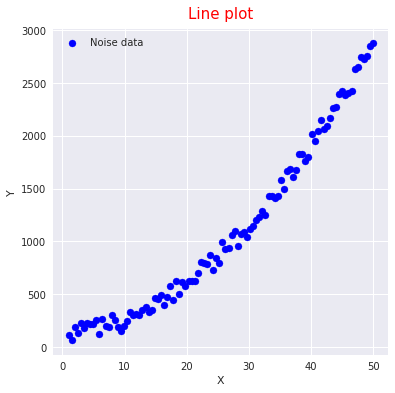

In [3]:
noise = np.random.random(100) *200
# add the noise to the original Y
Yfit= Y+noise
# plot the effect
plt.figure(figsize=(6,6))
plt.scatter(X,Yfit,c="b",label="Noise data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Line plot",size=15,color="r",pad=10)
plt.legend()
plt.show()

## 3-curve fitting using scipy
### what to do :
- define the function used to get the parameters
- use the optimize.curve_fit to get the parameter 

In [4]:
# defining the function of the second degree
def poly(x,a,b,c):
    y= a*(x**2)+b*x+c
    return y
# applying to the model 
from scipy.optimize import curve_fit
result= curve_fit(poly,X,Yfit)
print(result)

(array([  1.0667651 ,   1.33203903, 153.44435438]), array([[ 9.22419918e-04, -4.70434148e-02,  4.11514200e-01],
       [-4.70434148e-02,  2.54980034e+00, -2.48271729e+01],
       [ 4.11514200e-01, -2.48271729e+01,  3.12243786e+02]]))


- we only want the first array that return the value of the parameters i defined in the function 
a= 1.0087  , b=4.339 ,c=115.762

## 4-show the reaults

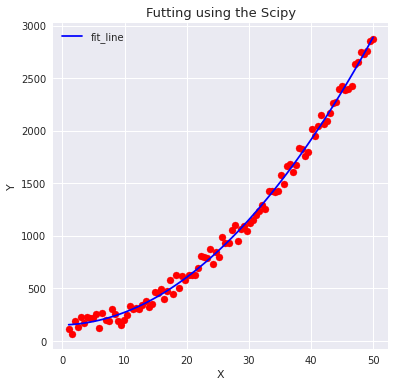

In [5]:
def scipy(x):
    y=result[0][0]*(x**2)+ result[0][1] * x + result[0][2]
    return y
plt.figure(figsize=(6,6))
plt.scatter(X,Yfit,c="r")
plt.plot(X,scipy(X),c="b",label="fit_line")
plt.title("Futting using the Scipy",size=13)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show() 

## 5- Using sklearn

### 5.1 - linear model of first degree 

In [6]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X.reshape(-1,1),Yfit.reshape(-1,1))
cof=model.coef_
intercept= model.intercept_

In [7]:
cof, intercept

(array([[55.73705936]]), array([-322.46577882]))

Text(0, 0.5, 'Y')

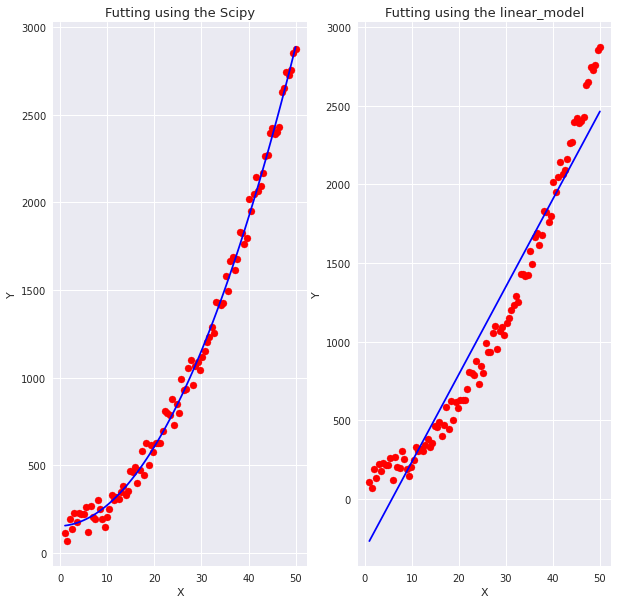

In [8]:
# tring to fit the curve
def linear(x,a,b):
    return a*x+b
plt.figure(figsize=(10,10))
ax1= plt.subplot(1,2,1)
ax1.scatter(X,Yfit,c="r")
ax1.plot(X,scipy(X),c="b")
ax1.set_title("Futting using the Scipy",size=13)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax2= plt.subplot(1,2,2)
ax2.scatter(X,Yfit,c="r")
ax2.plot(X.reshape(-1,),linear(X,cof,intercept).reshape(-1,),c="b")
ax2.set_title("Futting using the linear_model",size=13)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

### 5.1 - Polynomial features of second degree
- sklearn.preprocessing.PolynomialFeatures : get all possible combination of the features up to the degree you want 
- you can check the documentation better <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" > Here </a>

In [9]:
# applying polynomial preprocessingn to the features to apply higher degree
from sklearn.preprocessing import PolynomialFeatures
polyf=PolynomialFeatures(2,include_bias=False) # 2 indicated the digree of the polynomial
new_x=polyf.fit_transform(X.reshape(-1,1))
new_x

array([[1.00000000e+00, 1.00000000e+00],
       [1.49494949e+00, 2.23487399e+00],
       [1.98989899e+00, 3.95969799e+00],
       [2.48484848e+00, 6.17447199e+00],
       [2.97979798e+00, 8.87919600e+00],
       [3.47474747e+00, 1.20738700e+01],
       [3.96969697e+00, 1.57584940e+01],
       [4.46464646e+00, 1.99330681e+01],
       [4.95959596e+00, 2.45975921e+01],
       [5.45454545e+00, 2.97520661e+01],
       [5.94949495e+00, 3.53964902e+01],
       [6.44444444e+00, 4.15308642e+01],
       [6.93939394e+00, 4.81551882e+01],
       [7.43434343e+00, 5.52694623e+01],
       [7.92929293e+00, 6.28736864e+01],
       [8.42424242e+00, 7.09678604e+01],
       [8.91919192e+00, 7.95519845e+01],
       [9.41414141e+00, 8.86260586e+01],
       [9.90909091e+00, 9.81900826e+01],
       [1.04040404e+01, 1.08244057e+02],
       [1.08989899e+01, 1.18787981e+02],
       [1.13939394e+01, 1.29821855e+02],
       [1.18888889e+01, 1.41345679e+02],
       [1.23838384e+01, 1.53359453e+02],
       [1.287878

### note:
- the fist column -> X
- the second column -> X^2

In [10]:
poly_model= LinearRegression()
poly_model.fit(new_x,Yfit.reshape(-1,1))
poly_coef=poly_model.coef_
poly_intercept= poly_model.intercept_
poly_coef,poly_intercept

(array([[1.33203973, 1.06676509]]), array([153.44434839]))

In [11]:
poly_coef

array([[1.33203973, 1.06676509]])

##### acording to the output, the function can be written like this
  ####  y = 1.008 x^2 + 4.339 X + 115.76
 #### which is simillar to the output of the scipy curve_fit method

In [12]:
def poly_model(X,coef,intercept):
    return coef[0][1]*(X**2)+ coef[0][0]* X + intercept

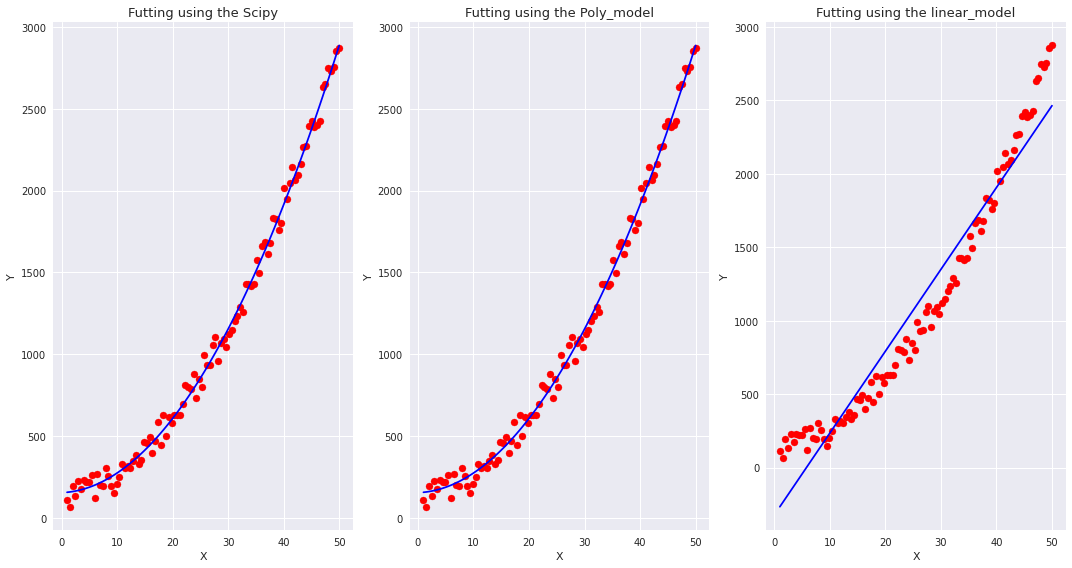

In [13]:
plt.figure(figsize=(15,8))
ax1= plt.subplot(1,3,1)
ax1.scatter(X,Yfit,c="r")
ax1.plot(X,scipy(X),c="b")
ax1.set_title("Futting using the Scipy",size=13)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax2= plt.subplot(1,3,2)
ax2.scatter(X,Yfit,c="r")
ax2.plot(X.reshape(-1,),poly_model(X,poly_coef,poly_intercept).reshape(-1,),c="b")
ax2.set_title("Futting using the Poly_model",size=13)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax3= plt.subplot(1,3,3)
ax3.scatter(X,Yfit,c="r")
ax3.plot(X.reshape(-1,),linear(X,cof,intercept).reshape(-1,),c="b")
ax3.set_title("Futting using the linear_model",size=13)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
plt.tight_layout()

### it is very simple notebook ,but if there is any mistakes or auggestions ... please,write a cooment 
### Thanks 